In [38]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [39]:
dataset = pd.read_csv("datasets/diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [41]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* In ( Pregnancies ) A minimum value is 0 indicates that there are individuals in the dataset who have not been pregnant.
* columns related to health measurements like 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI,' a value of 0 indicate missing or invalid data so i will consider these as missing values and handle them.

In [42]:
columns_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
dataset[columns_clean] = dataset[columns_clean].replace(0, float('nan'))

## visualization

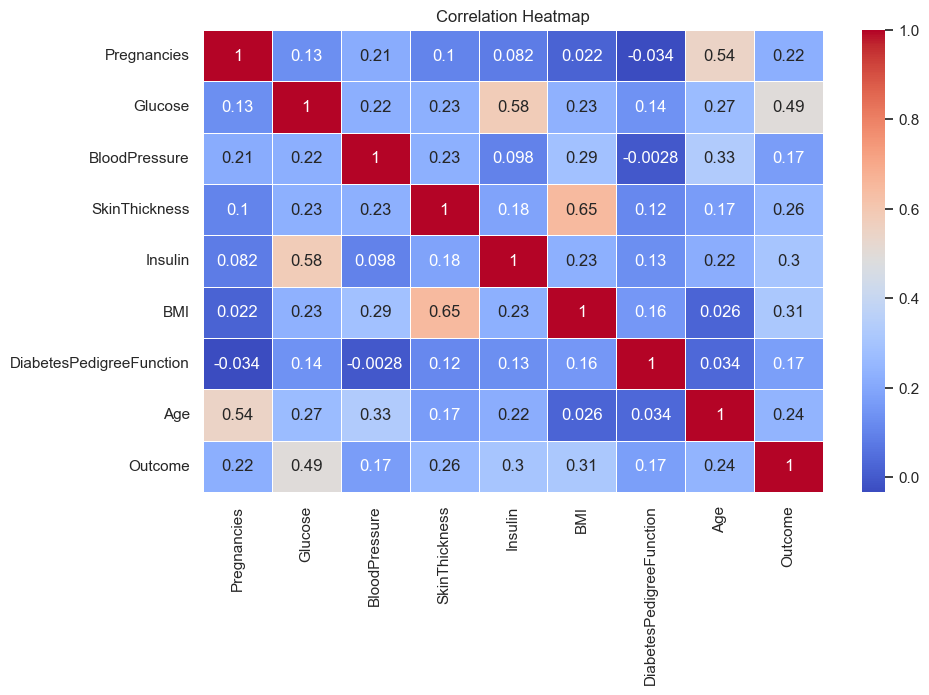

In [43]:

#Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

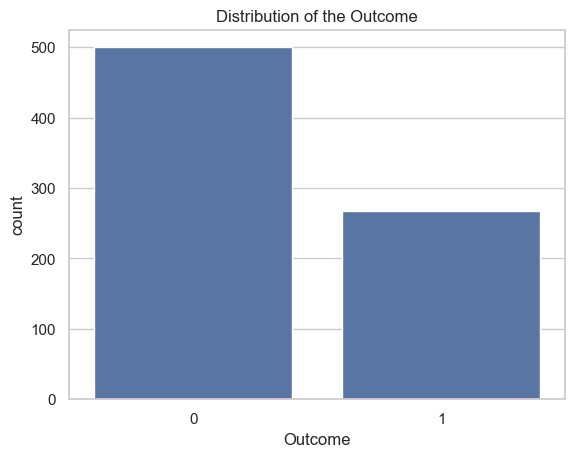

In [44]:
sns.countplot(x="Outcome", data=dataset)
plt.title("Distribution of the Outcome")
plt.show()

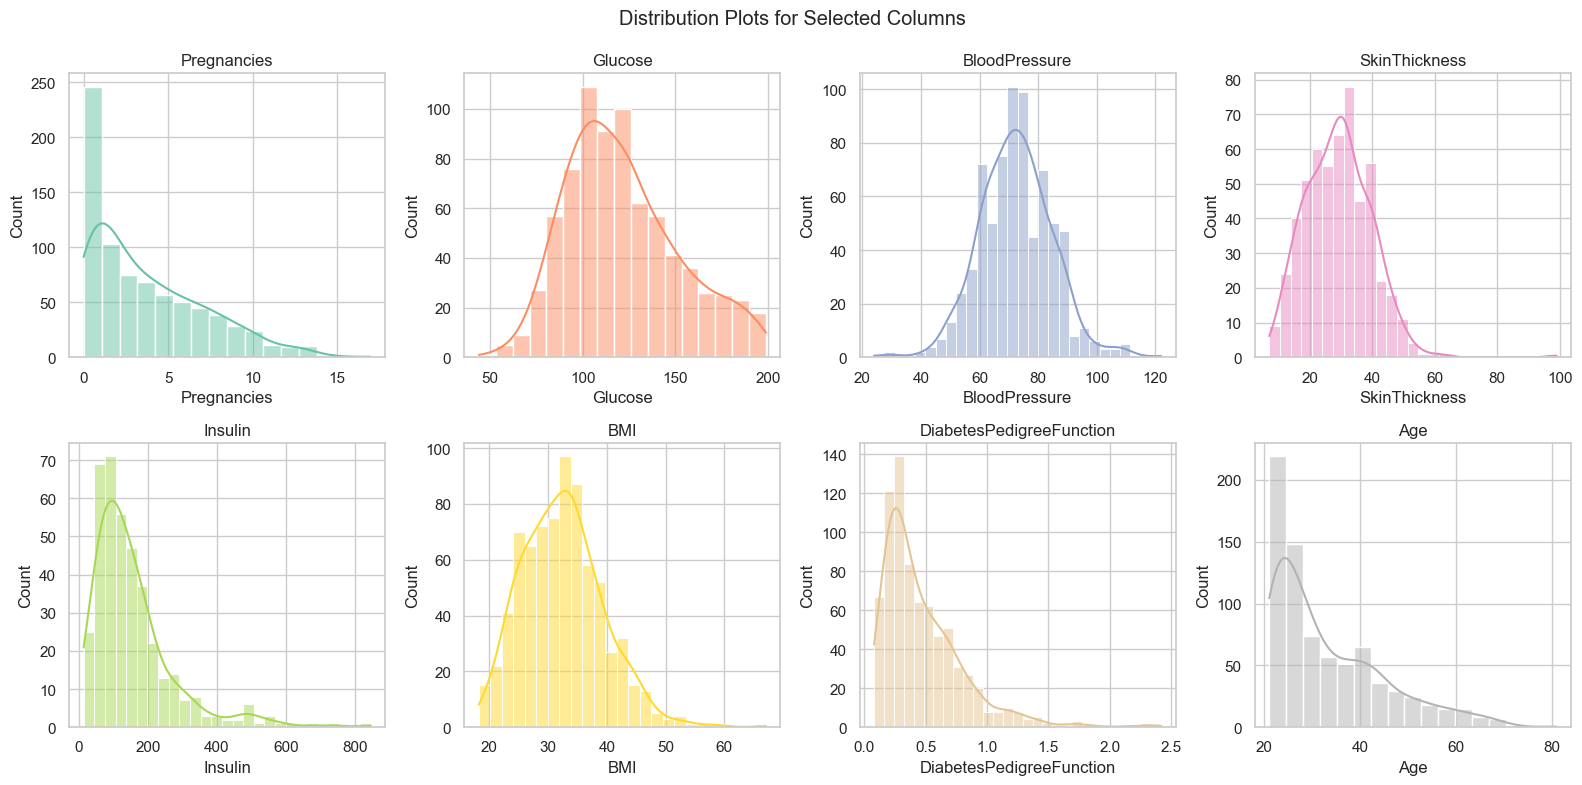

In [45]:
columns_to_plot = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle("Distribution Plots for Selected Columns")
palette = sns.color_palette("Set2")
# Create distribution plots for each column
for i, (column, color) in enumerate(zip(columns_to_plot, palette)):
    row = i // 4
    col = i % 4
    sns.histplot(dataset[column], kde=True, color=color, ax=axes[row, col])
    axes[row, col].set_title(column)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()

## Conclusion
Most people's pregnancies between 0-2.5 months -Most people's glucose level ranges between 100 and 125 -Most people's (60 < blood pressure is < 80) -Most people have a (25< skin thickness< 30 ) -Most people's insulin level about 125 -Most people's BMI level ranges between 30 and 40 -Most people are between the ages of 20 and 30

## Models

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [47]:
X = dataset.drop("Outcome", axis  =1)
y = dataset["Outcome"]

In [48]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [49]:
from sklearn.preprocessing import StandardScaler

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [50]:
# SimpleImputer for numerical and categorical features to fill missing values
num_imputer = SimpleImputer(strategy = "median")

In [51]:
#numirical pipeline
num = Pipeline([
    ("num_imputer", num_imputer),
    ("scaler", StandardScaler()),
])

In [52]:
#total pipeline
cleaning = ColumnTransformer([
    ("num", num, ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])])

In [53]:
cleaning.fit(X_train, y_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Pregnancies', 'Glucose', 'BloodPressure',
                                  'SkinThickness', 'Insulin', 'BMI',
                                  'DiabetesPedigreeFunction', 'Age'])])

In [54]:
# Apply the pipeline transformations on training and testing data
X_train_transformed = cleaning.transform(X_train)
X_test_transformed = cleaning.transform(X_test)

In [55]:
from sklearn.model_selection import GridSearchCV
models = {
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression(),
    'RandomForest': RandomForestClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'KNeighbors': KNeighborsClassifier()
}

param_grid = {
    'SVC': {'C':[0.001, 0.01, 0.1, 1], 'kernel': ['linear', 'rbf']},
    'LogisticRegression': {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 100]},
    'RandomForest': {'n_estimators': [10,20,50, 100, 200], 'max_depth': [None,3,2, 10, 20]},
    'DecisionTree': {'max_depth':[3, 5, 7, 9, 11, 13]},
    'KNeighbors': {'n_neighbors': [3, 20, 2]}
}

results_list = []

for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train_transformed, y_train)
    best_params = grid_search.best_params_
    accuracy = grid_search.best_score_
    results_list.append({'Model': model_name, 'Best_Params': best_params, 'Accuracy': accuracy})

results_df = pd.DataFrame(results_list)

results_df

,Model,Best_Params,Accuracy
0,SVC,"{'C': 0.01, 'kernel': 'linear'}",0.760450
1,LogisticRegression,{'C': 1},0.763973
2,RandomForest,"{'max_depth': 3, 'n_estimators': 20}",0.760495
3,DecisionTree,{'max_depth': 5},0.729205
4,KNeighbors,{'n_neighbors': 20},0.739595


C:\Users\DC\AppData\Local\Temp\ipykernel_9476\2543636600.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')


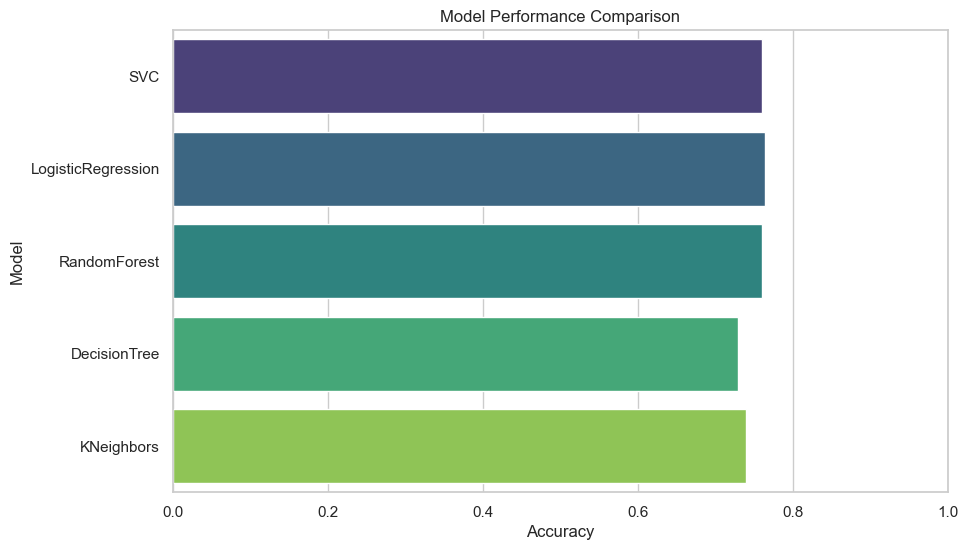

In [56]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Performance Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)  # Set the x-axis range from 0 to 1 for accuracy values
plt.show()

In [57]:
best_model = RandomForestClassifier()

In [58]:
best_model.fit(X_train_transformed ,y_train)

RandomForestClassifier()

In [59]:

y_pred = best_model.predict(X_test_transformed)

In [60]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.77


In [61]:
dataset.iloc[100]

Pregnancies                   1.000
Glucose                     163.000
BloodPressure                72.000
SkinThickness                   NaN
Insulin                         NaN
BMI                          39.000
DiabetesPedigreeFunction      1.222
Age                          33.000
Outcome                       1.000
Name: 100, dtype: float64

In [62]:
# Testing on sample data
pregnancies = int(input("Enter New Patient's Number of Pregnancies: "))
glucose = int(input("Enter New Patient's Glucose level: "))
blood_pressure = int(input("Enter New Patient's Blood Pressure: "))
skin_thickness = int(input("Enter New Patient's Skin Thickness: "))
insulin = int(input("Enter New Patient's Insulin level: "))
bmi = float(input("Enter New Patient's BMI: "))
diabetes_pedigree_function = float(input("Enter New Patient's Diabetes Pedigree Function: "))
age = int(input("Enter New Patient's age: "))

sample = [[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree_function, age]]
# Convert the list 'sample' into a DataFrame
sample_df = pd.DataFrame(sample, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

# Transform the sample using the 'cleaning' pipeline
sample_transformed = cleaning.transform(sample_df)
result = best_model.predict(sample_transformed)

print(result)

if result == 1:
    print("Patient might have diabetes.")
else:
    print("Patient might not have diabetes.")

[1]
Patient might have diabetes.
